Exploring Data Scraping, Analysis, and Visualization: Practical Examples by Hannu Valve

# Section 1, IMDB Scraping and Analysis

In [ ]:
import requests
import json
from bs4 import BeautifulSoup

# Make a request to the IMDb URL
url = "https://www.imdb.com/chart/top"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup (to find script tag)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the script tag with id __NEXT_DATA__
script_tag = soup.find('script', {'id': '__NEXT_DATA__'})

# Extract the JSON data from the script tag
if script_tag:
    json_data_str = script_tag.string
    json_data_str = json_data_str.replace('undefined', 'null')  # Replace 'undefined' with 'null' to make the JSON string valid

    # Load JSON data
    try:
        json_data = json.loads(json_data_str)
    except json.JSONDecodeError:
        print("Error: Unable to decode JSON data.")
        exit()

    # Access the movie details from the JSON data
    movies = json_data.get('props', {}).get('pageProps', {}).get('pageData', {}).get('chartTitles', {}).get('edges', [])

    for index, movie in enumerate(movies, start=1):
        movie_node = movie.get('node', {})
        movie_id = movie_node.get('id')
        title = movie_node.get('titleText', {}).get('text')
        year = movie_node.get('releaseYear', {}).get('year')
        rating = movie_node.get('ratingsSummary', {}).get('aggregateRating')
        vote_count = movie_node.get('ratingsSummary', {}).get('voteCount')

        # Print the movie details
        # print(f"{index}. ID: {movie_id}, Title: {title}, Year: {year}, Rating: {rating}, Votes: {vote_count}")
else:
    print("Error: Script tag not found or JSON data unavailable.")
    exit()

In [ ]:
# Perform data analysis
# For example, you can calculate the average rating and the movie with the highest rating
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
average_rating = sum(ratings) / len(ratings)
highest_rated_movie = max(movies, key=lambda x: x['node']['ratingsSummary']['aggregateRating'])

# Print the results of the data analysis
print(f"Average Rating: {average_rating:.2f}")
print(f"Highest Rated Movie: {highest_rated_movie['node']['titleText']['text']} - Rating: {highest_rated_movie['node']['ratingsSummary']['aggregateRating']}")

# Calculate the average runtime of the movies
runtimes = [movie['node']['runtime']['seconds'] for movie in movies]
average_runtime = sum(runtimes) / len(runtimes)

# Print the result
print(f"Average Runtime: {average_runtime // 60} minutes")

# Calculate the average release year of the movies
release_years = [movie['node']['releaseYear']['year'] for movie in movies]
average_release_year = sum(release_years) / len(release_years)

# Print the result
print(f"Average Release Year: {int(average_release_year)}")

Average Rating: 8.31
Highest Rated Movie: The Shawshank Redemption - Rating: 9.3
Average Runtime: 129.0 minutes
Average Release Year: 1986


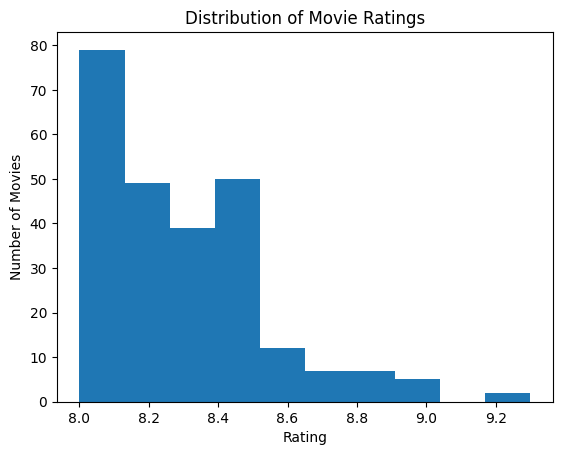

In [ ]:
# Visualize the distribution of movie ratings
import matplotlib.pyplot as plt

ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
plt.hist(ratings, bins=10)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()

In [ ]:
# Identify the top genres in the list
genres = {}
for movie in movies:
    for genre in movie['node']['titleGenres']['genres']:
        genre_name = genre['genre']['text']
        if genre_name in genres:
            genres[genre_name] += 1
        else:
            genres[genre_name] = 1

# Print the top genres
top_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Genres:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

Top Genres:
Drama: 177
Adventure: 60
Crime: 51
Action: 51
Comedy: 45


In [ ]:
import plotly.graph_objects as go

# Extract the release year for each movie
years = [movie['node']['releaseYear']['year'] for movie in movies]

# Count the number of movies released each year
year_counts = {}
for year in years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# Create a bar chart of the number of movies per year
fig = go.Figure(data=[go.Bar(x=list(year_counts.keys()), y=list(year_counts.values()))])
fig.update_layout(title='Number of TOP Movies Released Each Year', xaxis_title='Year', yaxis_title='Number of Movies')
fig.show()

In [ ]:
import plotly.graph_objects as go

# Create a dictionary of genres and the number of movies in each genre
genre_counts = {}
for movie in movies:
    for genre in movie['node']['titleGenres']['genres']:
        genre_name = genre['genre']['text']
        if genre_name in genre_counts:
            genre_counts[genre_name] += 1
        else:
            genre_counts[genre_name] = 1

# Create a bar chart of the number of movies per genre
fig = go.Figure(data=[go.Bar(x=list(genre_counts.keys()), y=list(genre_counts.values()))])
fig.update_layout(title='Number of Movies per Genre', xaxis_title='Genre', yaxis_title='Number of Movies')
fig.show()

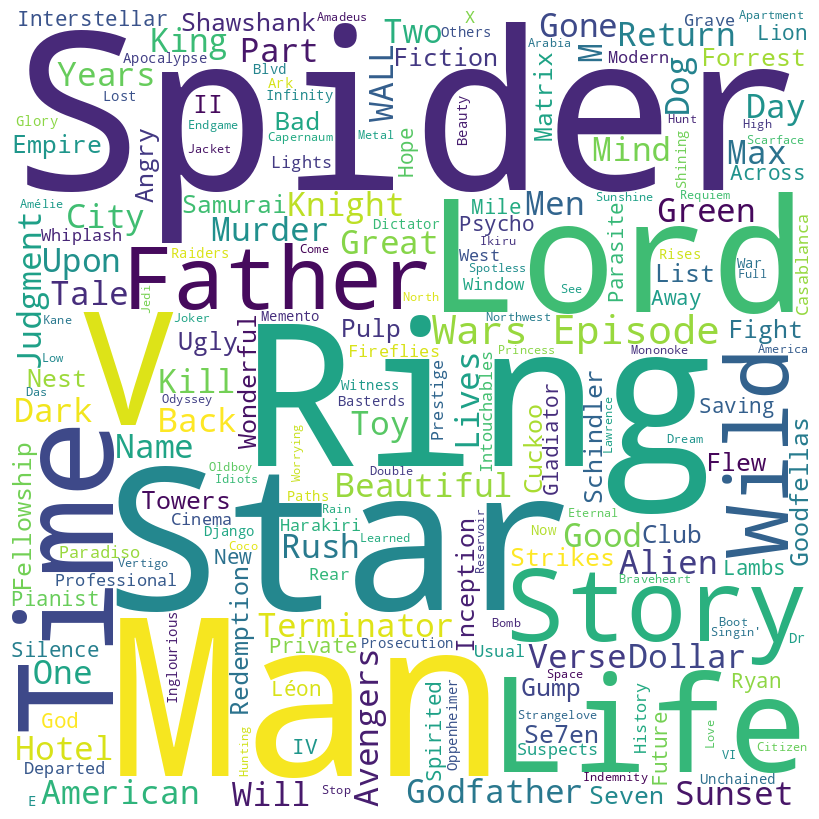

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the titles of the movies
titles = [movie['node']['titleText']['text'] for movie in movies]

# Create a word cloud of the movie titles
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(titles))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Extract the ratings and number of votes for each movie
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
votes = [movie['node']['ratingsSummary']['voteCount'] for movie in movies]
titles = [movie['node']['titleText']['text'] for movie in movies]

# Create a scatter plot of average rating vs. number of votes
fig = go.Figure(data=[go.Scatter(x=votes, y=ratings, mode='markers',
                                  hovertext=titles, marker=dict(size=10))])
fig.update_layout(title='Average Rating vs. Number of Votes',
                  xaxis_title='Number of Votes', yaxis_title='Average Rating')
fig.show()


In [ ]:
import plotly.graph_objects as go

# Extract the ratings and genres for each movie
ratings = [movie['node']['ratingsSummary']['aggregateRating'] for movie in movies]
genres = []
for movie in movies:
    for genre in movie['node']['titleGenres']['genres']:
        genres.append(genre['genre']['text'])

# Create a box plot of ratings by genre
fig = go.Figure(data=[go.Box(x=genres, y=ratings)])
fig.update_layout(title='Ratings by Genre', xaxis_title='Genre', yaxis_title='Rating')
fig.show()

# Section 2, Ebay Scraping and Analysis

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Constants
EBAY_SOLD_ITEMS_URL = 'https://www.ebay.com/sch/i.html?_nkw={}&LH_Sold=1'

def extract_sold_item_data(item):
    title_element = item.find('a', {'class': 's-item__link'})
    price_element = item.find('span', {'class': 's-item__price'})
    date_element = item.find('span', {'class': 'POSITIVE'})
    condition_element = item.find('span', {'class': 'SECONDARY_INFO'})
    seller_element = item.find('span', {'class': 's-item__seller-info-text'})

    if all(element is not None for element in [title_element, price_element, date_element]):
        title = title_element.text.strip()
        link = title_element['href']
        price = price_element.text.strip()
        date = date_element.text.strip()
        condition = condition_element.text.strip() if condition_element else None
        seller_info = seller_element.text.strip() if seller_element else None

        return {
            'title': title,
            'link': link,
            'price': price,
            'date': date,
            'condition': condition,
            'seller_info': seller_info
        }
    else:
        return None

def scrape_ebay_sold_items(query):
    scraped_data = []
    try:
        url = EBAY_SOLD_ITEMS_URL.format(query)
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        items = soup.find_all('div', {'class': 's-item__wrapper'})

        for item in items:
            data = extract_sold_item_data(item)
            if data:
                scraped_data.append(data)

        return scraped_data

    except requests.exceptions.RequestException as e:
        logger.error(f"An error occurred during the request: {e}")
    except Exception as e:
        logger.error(f"An unexpected error occurred: {e}")

def clean_data(ebay_sold_items_df):
    ebay_sold_items_df['date'] = pd.to_datetime(ebay_sold_items_df['date'].str.split('Sold  ').str[1], format='%b %d, %Y')
    ebay_sold_items_df['price'] = ebay_sold_items_df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    ebay_sold_items_df['price'] = pd.to_numeric(ebay_sold_items_df['price'], errors='coerce')
    return ebay_sold_items_df

if __name__ == "__main__":

    # Possibility for user to input the query
    # query = input("Enter the search query: ")

    query = 'pokemon cards'
    sold_items_data = scrape_ebay_sold_items(query)

    if sold_items_data:
        ebay_sold_items_df = pd.DataFrame(sold_items_data)
        cleaned_data = clean_data(ebay_sold_items_df)
        logger.info(f"Scraped data:\n{cleaned_data}")
    else:
        logger.info("No data scraped.")


In [ ]:
from datetime import datetime

# Convert 'date' column to datetime format
ebay_sold_items_df['date'] = pd.to_datetime(ebay_sold_items_df['date'])

# Get the current month
current_month = datetime.now().month

# Filter the DataFrame for the running month
current_month_df = ebay_sold_items_df[ebay_sold_items_df['date'].dt.month == current_month]

In [ ]:
total_sales = current_month_df['price'].sum()
print("\nTotal sales for the current month: $", total_sales)
average_price = current_month_df['price'].mean().round(2)
print("\nAverage price of sold items for the current month: $", average_price)
most_expensive_item = current_month_df.sort_values('price', ascending=False).iloc[0]
print("\nThe most expensive item sold in the current month:\n")
print(most_expensive_item)


Total sales for the current month: $ 1465.1200000000001

Average price of sold items for the current month: $ 29.9

The most expensive item sold in the current month:

title          New ListingCharizard 003/032 CLL Pokemon Card ...
link           https://www.ebay.com/itm/305308163271?hash=ite...
price                                                     179.99
date                                         2023-12-10 00:00:00
condition                                              Pre-Owned
seller_info                    two.cents.collectibles (453) 100%
Name: 36, dtype: object


In [ ]:
import plotly.express as px

# Visualization 1: Item Condition Distribution
fig_pie = px.pie(ebay_sold_items_df, names='condition', title='Item Condition Distribution',
              color_discrete_sequence=px.colors.qualitative.Set2)
fig_pie.update_traces(textinfo='percent+label', pull=[0.05] * len(ebay_sold_items_df['condition'].unique()))

# Visualization 2: Seller Rating vs. Price
seller_ratings = ebay_sold_items_df['seller_info'].apply(lambda x: int(x.split()[1][1:-1].replace(',', '')))
fig_scatter = px.scatter(ebay_sold_items_df, x=seller_ratings, y='price',
                  labels={'x': 'Seller Ratings', 'y': 'Price'}, title='Seller Rating vs. Price',
                  color='condition', color_discrete_sequence=px.colors.qualitative.Set2)
fig_scatter.update_traces(marker=dict(size=8, line=dict(width=0.5, color='black')), selector=dict(mode='markers'))

fig_pie.show()
fig_scatter.show()


In [ ]:
# Visualization 3: Price Distribution Histogram
price_distribution = px.histogram(ebay_sold_items_df, x='price', title='Price Distribution',
                                  nbins=30, template='plotly_white', opacity=0.7,
                                )
price_distribution.update_traces(marker_line_color='navy', marker_line_width=0.5)

# Visualization 4: Top Sellers by Quantity Sold Bar Chart
top_sellers = ebay_sold_items_df['seller_info'].value_counts().head(10)
top_sellers_chart = px.bar(top_sellers, x=top_sellers.index, y=top_sellers.values,
                           title='Top Sellers by Quantity Sold', color=top_sellers.values,
                           color_continuous_scale='RdBu')
top_sellers_chart.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.8)

# Show or save the updated visualizations
price_distribution.show()
top_sellers_chart.show()
